[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/MLBasics-Evaluation/blob/main/ml-eval.ipynb)

# Evaluation Methods
#### Author : J. Rafid Siddiqui (jrs@azaditech.com)


## Pre-requisites and Imports

In [ ]:
!pip install scikit-learn  #Needed for data and train-test split generation
!git clone https://www.github.com/azad-academy/MLBasics-Evaluation

In [1]:
from evaluation_metrics import *

# Data Generation

In [2]:
#For Standardizing the data within a range
scalar = MinMaxScaler(feature_range=(-1,1))

#Generating Random Data
rstate1 = np.random.RandomState(10)
rstate2 = np.random.RandomState(20)
rstate3 = np.random.RandomState(30)
X1, Y1 = sklearn.datasets.make_moons(n_samples=1000,noise=0.05,random_state=rstate1)
X2, Y2 = sklearn.datasets.make_moons(n_samples=500,noise=0.15,random_state=rstate2)
X3, Y3 = sklearn.datasets.make_moons(n_samples=600,noise=0.06,random_state=rstate3)

X_train = scalar.fit_transform(X1)
Y_train = Y1
X_test = scalar.fit_transform(X2)
Y_test = Y2

X2[:,0] = X2[:,0]+max(X1[:,0])
X3[:,0] = X3[:,0]+max(X2[:,0])

X = np.concatenate((X1,X2,X3))
Y = np.concatenate((Y1,Y2,Y3))

X_train2 = scalar.fit_transform(np.concatenate((X1,X2)))
Y_train2 = np.concatenate((Y1,Y2))
X_test2 = scalar.fit_transform(np.concatenate((X2,X3)))
Y_test2 = np.concatenate((Y2,Y3))

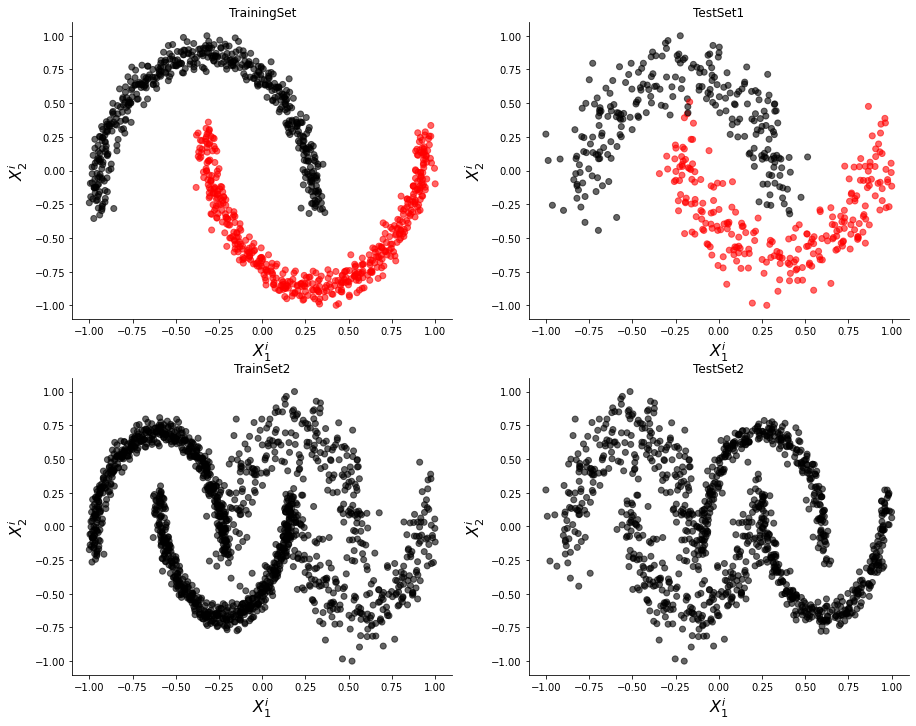

In [3]:
data_fig2,axes = plt.subplots(2,2,figsize=(15,12))
plot_data(X_train,Y_train,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TrainingSet",canvas=axes[0][0])
plot_data(X_test,Y_test,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="TestSet1",canvas=axes[0][1])
plot_data(X_train2,np.zeros((len(X_train2),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TrainSet2",canvas=axes[1][0])
plot_data(X_test2,np.zeros((len(X_test2),),dtype=int),xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k'],plt_title="TestSet2",canvas=axes[1][1])

# Bias Variance Analysis

# High Bias (Underfitting)

In [6]:
lmodel = LModel(X_train,Y_train)
P = lmodel.train()

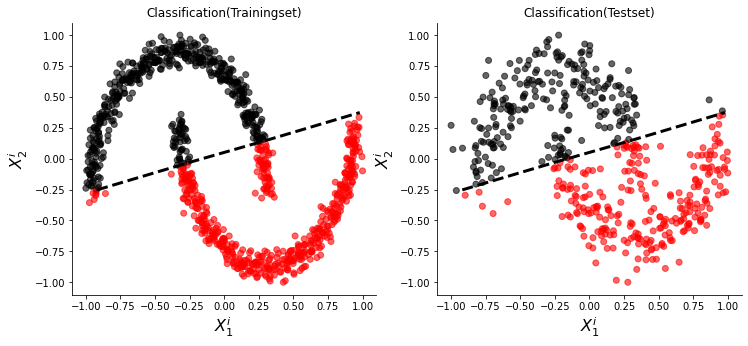

In [7]:
res_fig1,axes1 = plt.subplots(1,2,figsize=(12,5))

Y_hat = lmodel.predict(X_train)
plot_data(X_train,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Trainingset)",canvas=axes1[0])
Boundary = lmodel.get_decision_boundary()
axes1[0].plot(Boundary[:,0],Boundary[:,1],'k--',linewidth=3)

Y_hat = lmodel.predict(X_test)
plot_data(X_test,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Testset)",canvas=axes1[1])
Boundary = lmodel.get_decision_boundary()
axes1[1].plot(Boundary[:,0],Boundary[:,1],'k--',linewidth=3)

# High Variance (Overfitting)

In [8]:
nl_model1 = NLModel(X_train,Y_train,'poly')
with np.errstate(divide='ignore', invalid='ignore'):
    P = nl_model1.train(1000)

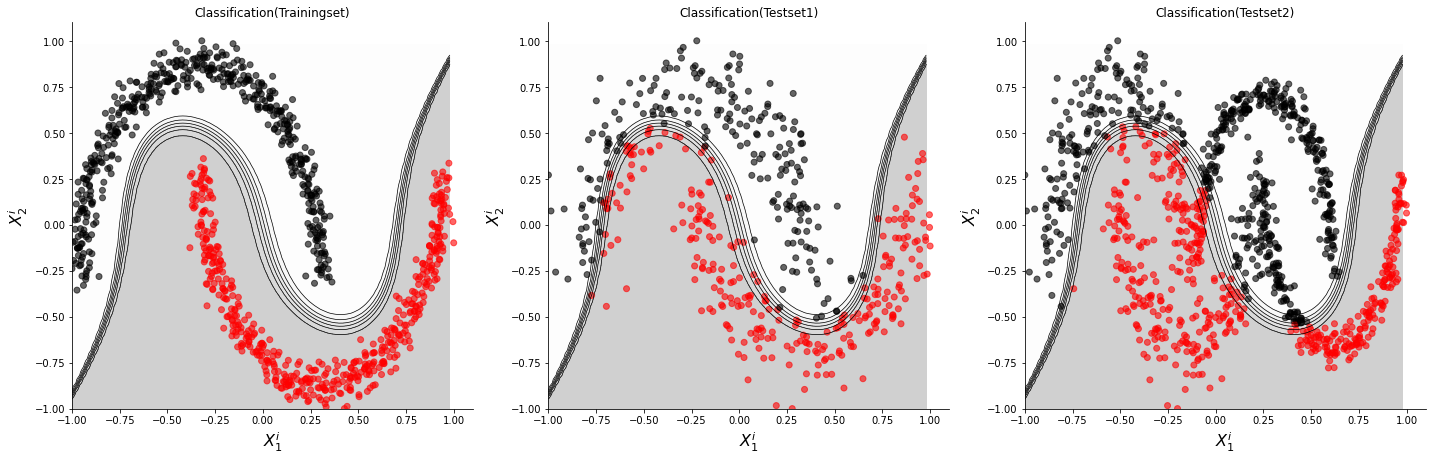

In [9]:
Y_hat = nl_model1.predict(X_train)
res_fig2,axes2 = plt.subplots(1,3,figsize=(20,6.5))

nl_model1.show_decision_boundary(axes2[0])
plot_data(X_train,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Trainingset)",canvas=axes2[0])

Y_hat = nl_model1.predict(X_test)
nl_model1.show_decision_boundary(axes2[1])
plot_data(X_test,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Testset1)",canvas=axes2[1])


Y_hat = nl_model1.predict(X_test2)
nl_model1.show_decision_boundary(axes2[2])
plot_data(X_test2,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Testset2)",canvas=axes2[2])

res_fig2.tight_layout()


# Overcoming Overfitting

## Using a Model with Better Features 

In [10]:
nl_model2 = NLModel(X_train,Y_train,'harmonic')
with np.errstate(divide='ignore', invalid='ignore'):
    P = nl_model2.train(1000)
    
nl_model2_2 = NLModel(X_train2,Y_train2,'harmonic')
with np.errstate(divide='ignore', invalid='ignore'):
    P = nl_model2_2.train(1000)    

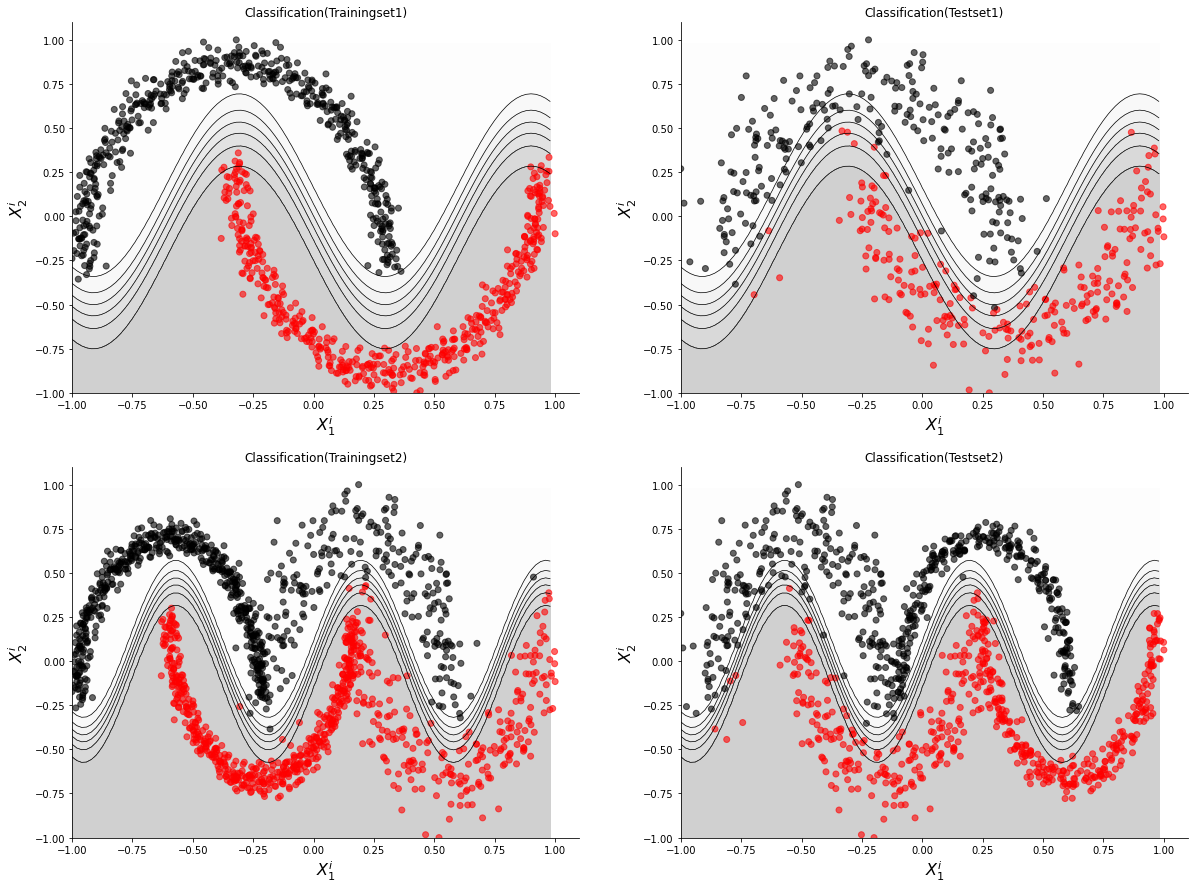

In [11]:
Y_hat = nl_model2.predict(X_train)

res_fig2,axes3 = plt.subplots(2,2,figsize=(20,15))
nl_model2.show_decision_boundary(axes3[0][0])
plot_data(X_train,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Trainingset1)",canvas=axes3[0][0])

Y_hat = nl_model2.predict(X_test)
nl_model2.show_decision_boundary(axes3[0][1])
plot_data(X_test,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Testset1)",canvas=axes3[0][1])

Y_hat = nl_model2_2.predict(X_train2)
nl_model2_2.show_decision_boundary(axes3[1][0])
plot_data(X_train2,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Trainingset2)",canvas=axes3[1][0])

Y_hat = nl_model2_2.predict(X_test2)
nl_model2_2.show_decision_boundary(axes3[1][1])
plot_data(X_test2,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Testset2)",canvas=axes3[1][1])



## Regularization

In [12]:
nl_model1 = NLModel(X_train,Y_train,'poly')
nl_model1_r = NLModel(X_train,Y_train,'poly',True)
with np.errstate(divide='ignore', invalid='ignore'):
    P = nl_model1.train(1000)
with np.errstate(divide='ignore', invalid='ignore'):
    P = nl_model1_r.train(1000,0.9)
    

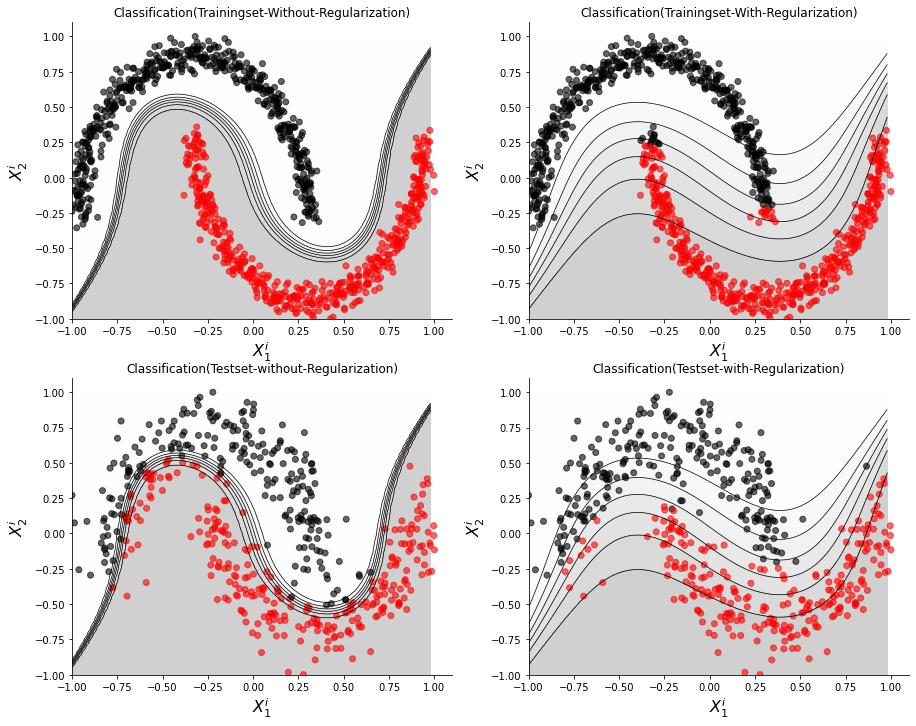

In [13]:
Y_hat = nl_model1.predict(X_train)
Y_hat_r = nl_model1_r.predict(X_train)

res_fig4,axes4 = plt.subplots(2,2,figsize=(15,12))

nl_model1.show_decision_boundary(axes4[0][0])
plot_data(X_train,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Trainingset-Without-Regularization)",canvas=axes4[0][0])

nl_model1_r.show_decision_boundary(axes4[0][1])
plot_data(X_train,Y_hat_r,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Trainingset-With-Regularization)",canvas=axes4[0][1])

Y_hat = nl_model1.predict(X_test)
nl_model1.show_decision_boundary(axes4[1][0])
plot_data(X_test,Y_hat,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Testset-without-Regularization)",canvas=axes4[1][0])

Y_hat_r = nl_model1_r.predict(X_test)
nl_model1_r.show_decision_boundary(axes4[1][1])
plot_data(X_test,Y_hat_r,xtitle=r'$X_1^i$',ytitle=r'$X_2^i$',colors=['k','r'],plt_title="Classification(Testset-with-Regularization)",canvas=axes4[1][1])


## Learning Curves 
#### (Curves may differ on each run due to the Randomness in picking data subsamples for efficiency)

Text(0.5, 1.0, 'Underfitting')

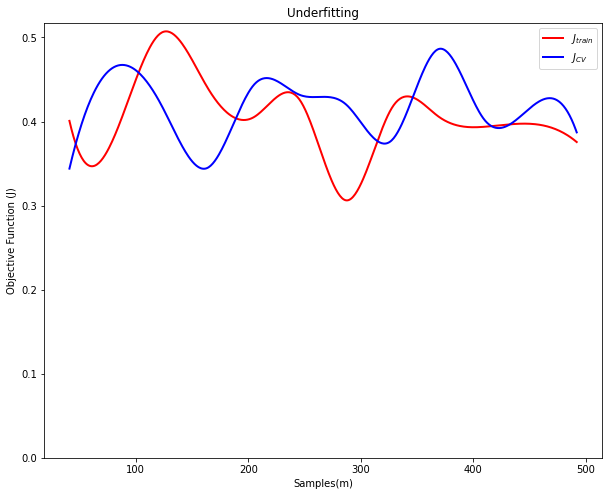

In [4]:
lmodel = LModel(X_train,Y_train)
ml_eval = Evaluation(lmodel,X_test,Y_test)
fig,ax = ml_eval.learning_curves()
ax.set_title('Underfitting')

Text(0.5, 1.0, 'Overfitting')

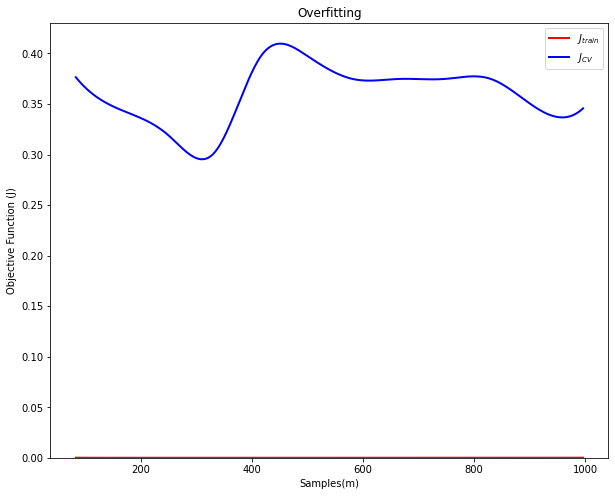

In [5]:
nlmodel = NLModel(X_train,Y_train,'poly')
ml_eval = Evaluation(nlmodel,X_test2,Y_test2)
fig,ax = ml_eval.learning_curves()
ax.set_title('Overfitting')

Text(0.5, 1.0, 'Best Fit')

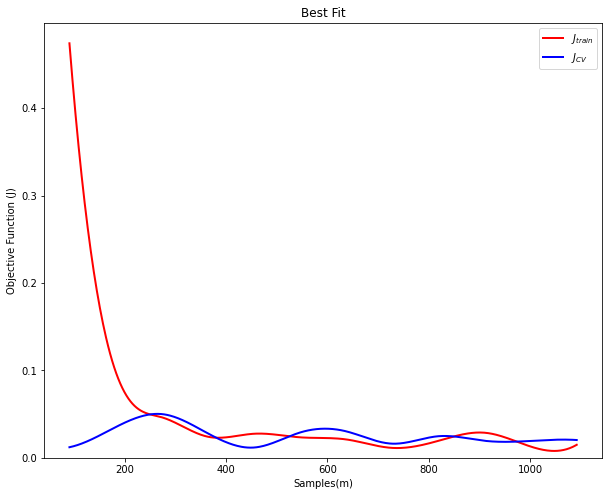

In [4]:
nlmodel = NLModel(X_train2,Y_train2,'harmonic')
ml_eval = Evaluation(nlmodel,X_test2,Y_test2)
fig,ax = ml_eval.learning_curves()
ax.set_title('Best Fit')

# Performance Metrics


## Accuracy, Precision, Recall, ROC-Curves

(0.85, 0.81, 0.91, 0.22)


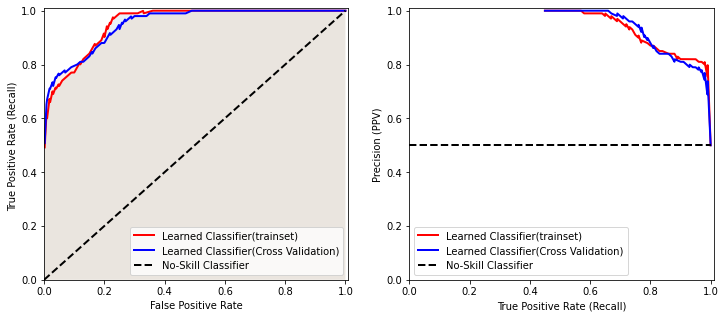

In [4]:
nlmodel = NLModel(X_train2,Y_train2)
with np.errstate(divide='ignore', invalid='ignore'):
    P = nlmodel.train()
    ml_eval = Evaluation(nlmodel,X_test2,Y_test2)
    perf = ml_eval.compute_performance(X_test2,Y_test2)
    print(perf)
    fig,ax = ml_eval.show_performance_curves()
    